In [1]:
train_losses = [0.5070090608597578, 0.18454982739431822, 0.14948267807708665, 0.12215025157197185, 0.1061576767944886, 0.10089877597085434, 0.09001206667584484, 0.07585637778053449, 0.07454268674875493, 0.07051461690415939, 0.06685808945085835, 0.06881841184600489, 0.05678518182501042, 0.05095050867389849, 0.055126452361485764, 0.05215822825635163, 0.049875900420593096, 0.04794981504368479, 0.0479074838100496, 0.04481348742061528, 0.04256501383722935, 0.04774731224126299, 0.04377503793858826, 0.04284848169084095, 0.042039405386652406]
val_losses = [0.22411827958965053, 0.14574929552113947, 0.13098954856434528, 0.10951458642589083, 0.10602271193250393, 0.08910481014153145, 0.08351156191745152, 0.07830168260804687, 0.08587744169325258, 0.06948682612904425, 0.06069102052618594, 0.06331976928301931, 0.0615763270969425, 0.056790472399249364, 0.05480494041946561, 0.05679643727712876, 0.05424520396637187, 0.054136853043455634, 0.051394703816040416, 0.05100395961577306, 0.04958960337234506, 0.05810411522378369, 0.04853614091553027, 0.04952806781181911, 0.04965174570728171]

train_accuracies = [0.87046875, 0.95150390625, 0.9623502604166667, 0.9688606770833333, 0.9721956380208333, 0.9738720703125, 0.9768440755208333, 0.979853515625, 0.9801708984375, 0.9809765625, 0.98185546875, 0.98177734375, 0.9846402994791666, 0.9860237630208334, 0.9850260416666666, 0.9856184895833333, 0.9861881510416667, 0.98669921875, 0.9867529296875, 0.9875895182291666, 0.9881494140625, 0.9868017578125, 0.987705078125, 0.9878971354166667, 0.9880289713541667]

val_accuracies = [0.9398697916666666, 0.9612955729166667, 0.9679947916666667, 0.97240234375, 0.9739388020833334, 0.97744140625, 0.9787239583333334, 0.9791145833333333, 0.97880859375, 0.98177734375, 0.9837434895833334, 0.982890625, 0.98384765625, 0.9844466145833334, 0.9849934895833333, 0.9849283854166667, 0.9854361979166667, 0.985390625, 0.9859700520833333, 0.9858268229166667, 0.9865494791666667, 0.9838736979166667, 0.9872005208333333, 0.9866471354166667, 0.9867447916666666]

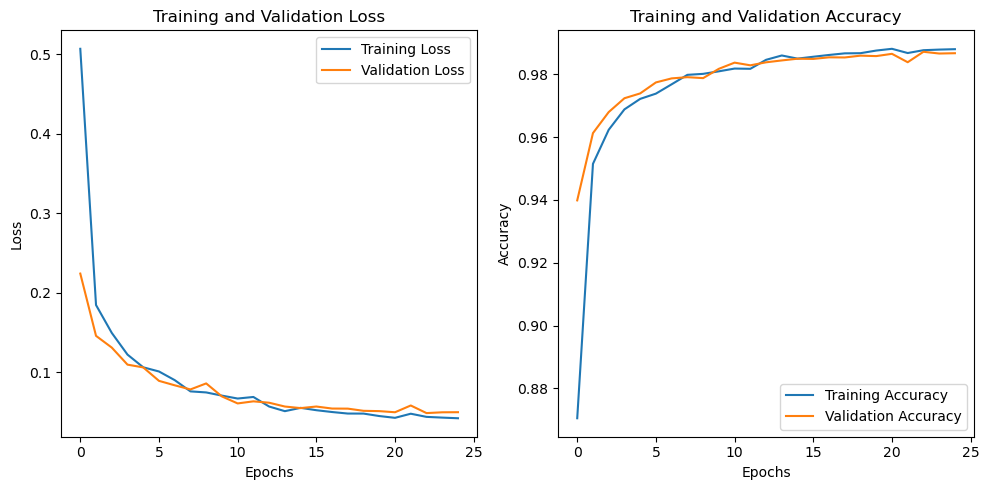

In [2]:
import matplotlib.pyplot as plt
# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

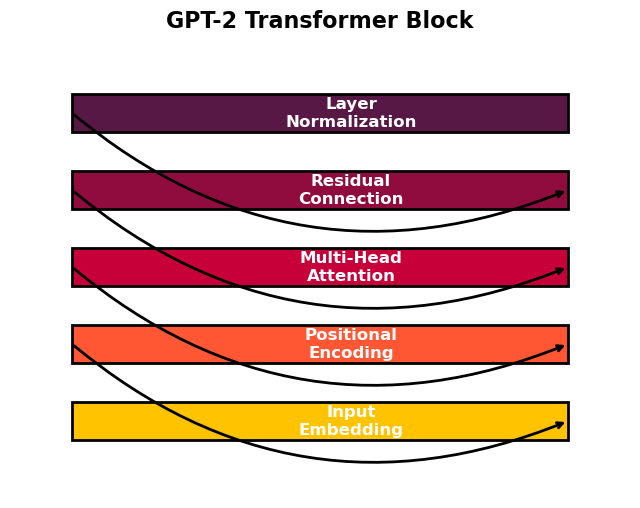

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define block colors
block_colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

# Create transformer block components
blocks = [
    ("Input\nEmbedding", 0.2, block_colors[0]),
    ("Positional\nEncoding", 0.4, block_colors[1]),
    ("Multi-Head\nAttention", 0.6, block_colors[2]),
    ("Residual\nConnection", 0.8, block_colors[3]),
    ("Layer\nNormalization", 1.0, block_colors[4])
]

# Draw transformer block components
for i, (label, y, color) in enumerate(blocks):
    rect = patches.Rectangle((0.1, y - 0.05), 0.8, 0.1, linewidth=2, edgecolor='black', facecolor=color)
    ax.text(0.55, y, label, va='center', ha='center', fontsize=12, fontweight='bold', color='white')
    ax.add_patch(rect)

# Add arrows between components
for i in range(len(blocks) - 1):
    ax.annotate("", xy=(0.9, blocks[i][1]), xytext=(0.1, blocks[i+1][1]),
                arrowprops=dict(arrowstyle='->', lw=2, connectionstyle="arc3,rad=0.3"))

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.2)
ax.axis('off')

# Add a title
ax.set_title("GPT-2 Transformer Block", fontsize=16, fontweight='bold')

# Display the diagram
plt.show()


In [1]:
import numpy as np
from reportlab.pdfgen import canvas
from reportlab.lib.units import mm
from reportlab.lib.styles import ParagraphStyle
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.platypus import Paragraph
import fitz  # PyMuPDF

# Registering an external font
pdfmetrics.registerFont(
    TTFont('mymonospace', 'fonts/AnonymousPro-Bold.ttf')
)

myParagraphStyle = ParagraphStyle(
    name='Normal',
    fontName='mymonospace',
    fontSize=12,
)

# Function to add color to characters
def add_color(s, color):
    return f'<font color="{color}">{s}</font>'

# Function to write the protein scaffold image
def write_protein_scaffold_image(target: str, predicted: str, filename: str):
    # Convert strings to numpy arrays for comparison
    target_array = np.array([c for c in target])
    predicted_array = np.array([c for c in predicted])

    # Find indices where the sequences differ
    incorrect_indices = np.where(target_array != predicted_array)[0]

    # Create the HTML for the paragraph
    scaffold = target_array.astype(object)
    for i in incorrect_indices:
        scaffold[i] = add_color(scaffold[i], "red")

    para = Paragraph("".join(elem for elem in scaffold), myParagraphStyle)

    # Creating a PDF object
    canvasSize = (125*mm, 18*mm)  
    pdf = canvas.Canvas(f"{filename}.pdf")
    pdf.setTitle(f"{filename}.pdf")
    pdf.setPageSize(canvasSize)
    pdf.setFont('mymonospace', 18)

    para.wrapOn(pdf, canvasSize[0] + 1*mm, 500*mm)
    para.drawOn(pdf, 0*mm, 1*mm)

    # Saving the PDF
    pdf.save()

    # Convert PDF to PNG
    dpi = 300
    zoom = dpi / 72
    magnify = fitz.Matrix(zoom, zoom)
    doc = fitz.open(f"{filename}.pdf")
    pix = doc[0].get_pixmap(matrix=magnify)
    pix.save(f"{filename}.png")

if __name__ == "__main__":
    # Example usage
    target_sequence = "ACDEFGHIKLMNPQRSTVWY"
    predicted_sequence = "ACDFFGHIKLMNPQRSTVWY"

    write_protein_scaffold_image(target_sequence, predicted_sequence, "protein_comparison")
